# Exercise 3-1: Create some plots

In [2]:
import pandas as pd

## Get the data

In [4]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [5]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


## Visualize the data

<Axes: xlabel='Year', ylabel='DeathRate'>

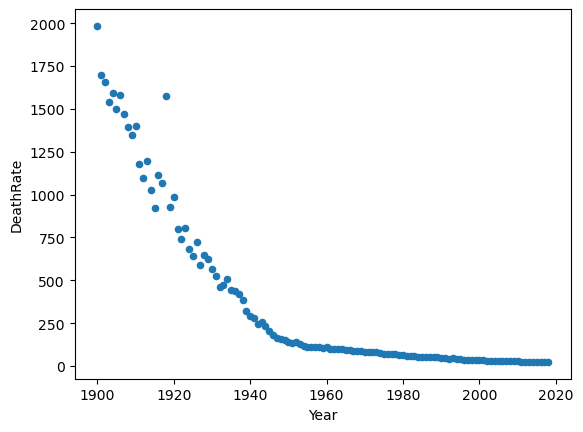

In [7]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<Axes: xlabel='Year'>

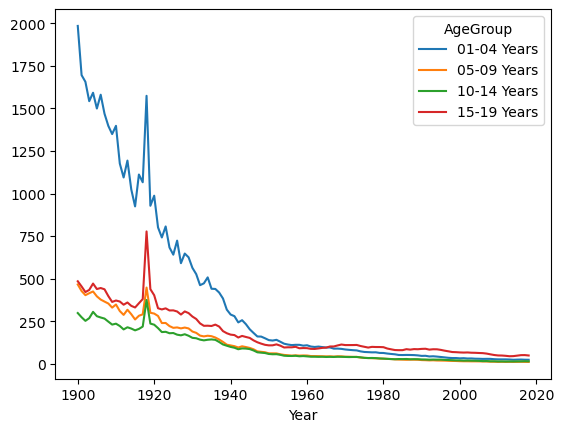

In [8]:
mortality_wide.plot()

<Axes: title={'center': 'Mortality Rate for 15-19 Age Group'}, xlabel='Year'>

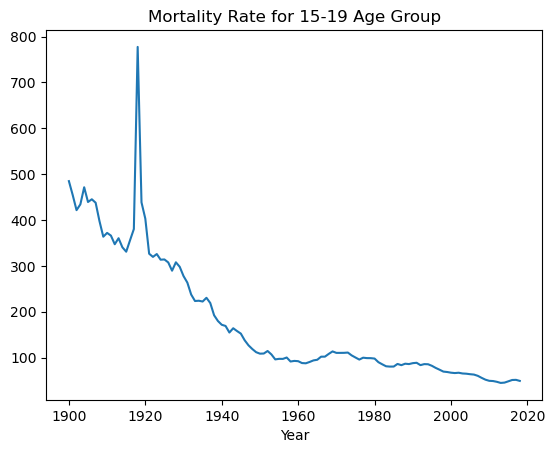

In [9]:
mortality_wide['15-19 Years'].plot(title='Mortality Rate for 15-19 Age Group', legend=False)

<Axes: title={'center': 'Mortality Rate by Age Group'}, xlabel='Year'>

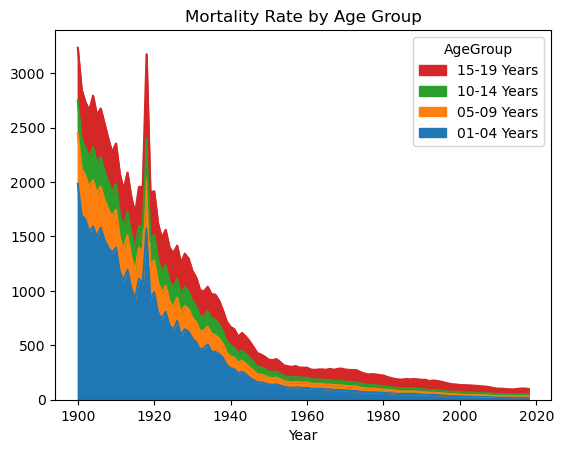

In [10]:
mortality_wide.plot.area(title='Mortality Rate by Age Group', legend="reverse")

<Axes: title={'center': 'Mortality Rates for 2000'}>

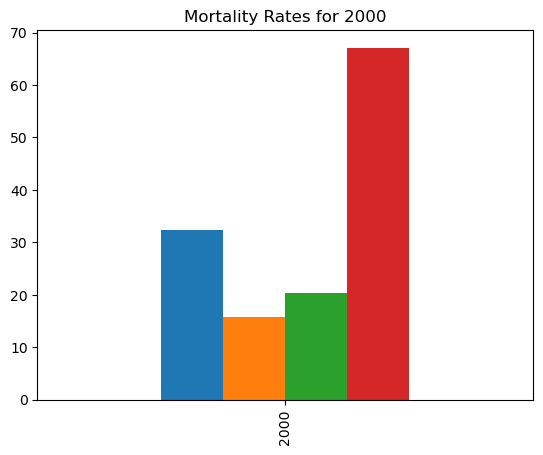

In [11]:
mortality_wide.query('Year == 2000').plot.bar(title='Mortality Rates for 2000', legend=False, xlabel='')

<Axes: title={'center': '(Long Data) Mortality Rates for 2000'}, ylabel='AgeGroup'>

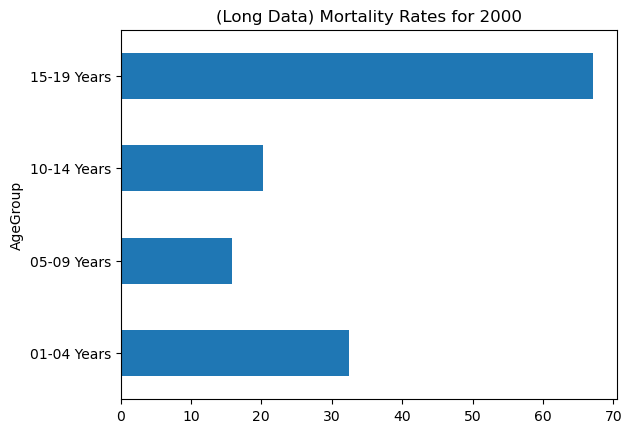

In [12]:
mortality_data.query('Year == 2000').pivot(index='AgeGroup', columns='Year', values='DeathRate').plot.barh(title='(Long Data) Mortality Rates for 2000', legend=False, xlabel='')

<Axes: ylabel='Frequency'>

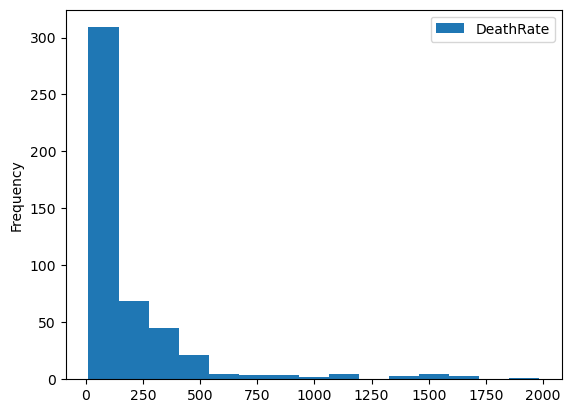

In [13]:
mortality_data.plot.hist(y='DeathRate', bins=15)

<Axes: title={'center': 'Density Plot of Death Rates in 1900'}, ylabel='Density'>

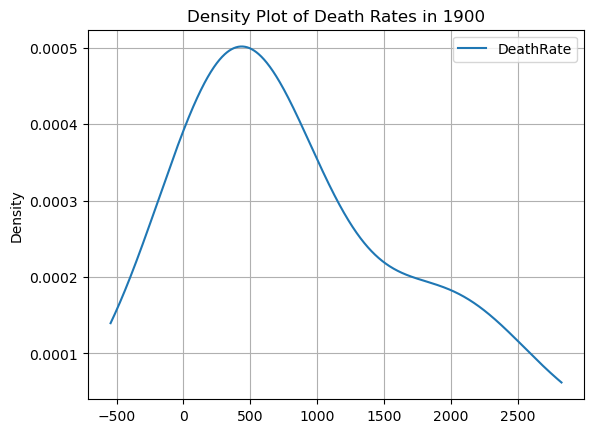

In [14]:
mortality_data.query('Year == 1900').plot.density(y='DeathRate', title='Density Plot of Death Rates in 1900', grid=True)

<Axes: ylabel='DeathRate'>

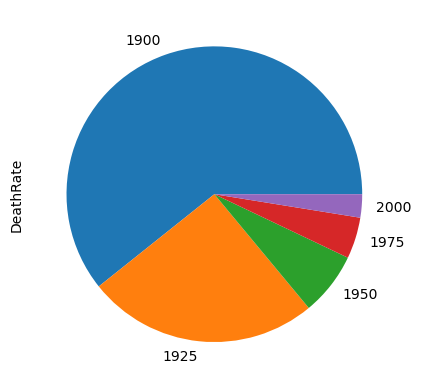

In [15]:
mortality_data.query('Year in [1900, 1925, 1950, 1975, 2000]').groupby('Year')['DeathRate'].sum().plot.pie(legend=False)

array([[<Axes: title={'center': 'Child Mortality: 01-04'}, ylabel='Year'>,
        <Axes: title={'center': 'Child Mortality: 05-09'}, ylabel='Year'>],
       [<Axes: title={'center': 'Child Mortality: 10-14'}, ylabel='Year'>,
        <Axes: title={'center': 'Child Mortality: 15-19'}, ylabel='Year'>]],
      dtype=object)

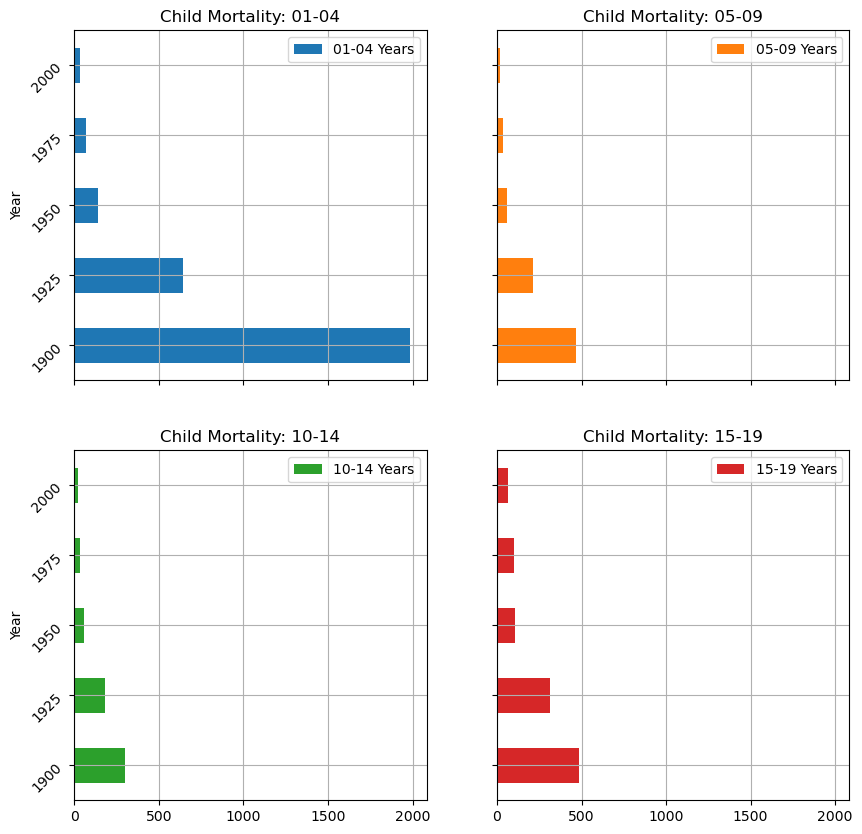

In [16]:
mortality_data.query('Year in (1900, 1925, 1950, 1975, 2000)') \
    .pivot(index='Year', columns='AgeGroup', values='DeathRate') \
    .plot.barh(title=['Child Mortality: 01-04', 'Child Mortality: 05-09', 'Child Mortality: 10-14', 'Child Mortality: 15-19'], 
               sharey=True, grid=True, rot=45, subplots=True, layout=(2,2), figsize=(10,10))